# Plotting cloud free time series

Import dependencies

In [1]:
docker_dir = '/rheil/notebooks/'
### Note: docker_dir is set when you call your docker command. In my case define this directory by calling:
### docker run -d -p 8888:8888 --name gee_demo -v /c/Users/rheil/code_repos/jupyter_gee_demo/:/rheil/notebooks -w /rheil/tylere/docker-debian-python3-scipy-notebook
### the cloud_mask.py file (and any other modules I'd want) are stored in this base directory on the virtual machine

# GEE import
import ee
ee.Initialize()

# Custom module
import sys 
sys.path.append(docker_dir)
import cloud_mask

# Data analysis libraries
import datetime
import pandas as pd

# Plotting libraries
from IPython.display import Image
%matplotlib inline
import seaborn as sns
from matplotlib import dates
import matplotlib.dates as mdates
from pylab import *


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Define start and end times

In [2]:
startTime = datetime.datetime(2000, 1, 1)
endTime = datetime.datetime(2003, 1, 1)

Load and prepare image collection

In [3]:
ic = ee.ImageCollection('LANDSAT/LT5_L1T_TOA_FMASK')
ic = ic.filterDate(startTime, endTime)
ic_prepper = cloud_mask.prep_ic('l5', 'toa_fmask')
ic = ic.map(ic_prepper)

Extract data for Death Valley

In [4]:
point = {'type':'Point', 'coordinates':[ -116.88629,36.56122]};  # death valley (should be stable)
info = ic.getRegion(point,500).getInfo()

Convert data to pandas dataframe

In [5]:
# create a Pandas dataframe of the data
data = array(info[0:])
data_df = pd.DataFrame(data[1:, 1:], columns = data[0, 1:], index = data[1:, 0])
# reformat the time information
data_df['time'] = data_df['time'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)/1000))
data_df.head()

,longitude,latitude,time,tir1,swir1,green,red,swir2,blue,nir,ndvi
LT50400352000011XXX02,-116.887,36.5592,2000-01-11 17:56:44.390,None,None,None,None,None,None,None,None
LT50400352000027XXX03,-116.887,36.5592,2000-01-27 17:56:13.199,None,None,None,None,None,None,None,None
LT50400352000043AAA02,-116.887,36.5592,2000-02-12 17:55:45.599,292.432,0.172781,0.120732,0.136316,0.147771,0.135496,0.157696,0.0727182
LT50400352000059XXX02,-116.887,36.5592,2000-02-28 17:55:08.335,294.212,0.180519,0.123104,0.141212,0.15856,0.137426,0.165293,0.0785681
LT50400352000075XXX02,-116.887,36.5592,2000-03-15 17:55:31.646,303.57,0.178772,0.132028,0.14785,0.159589,0.140396,0.167064,0.0610119


Plot data

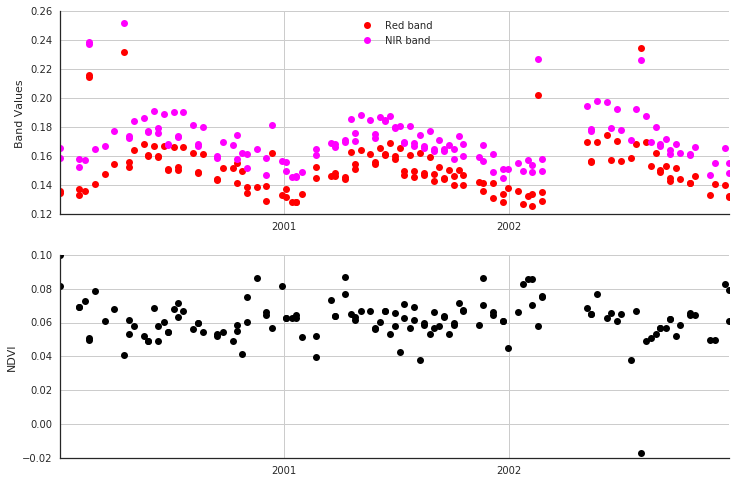

In [6]:
def plot_time_series(data_df):
    # matplotlib date format object
    fig = figure(figsize=(12,8), dpi=80)

    # plot the band values
    ax1 = fig.add_subplot(211)
    ax1.plot(data_df['time'], data_df['red'], 'o', color="red", label="Red band")
    ax1.plot(data_df['time'], data_df['nir'], 'o', color="magenta",  label="NIR band")
    ax1.legend(loc='best')
    ax1.grid(True)

    #plt.title('Band values as a function of time')
    ax1.set_ylabel('Band Values')

    # plot NDVI
    ax2 = fig.add_subplot(212, sharex=ax1)
    ax2.plot(data_df['time'], data_df['ndvi'], 'o', color="black", label="NDVI")
    ax2.grid(True)
    start, end = ax2.get_xlim()
    ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

    # Format the ticks.
    years    = mdates.YearLocator()   # every year
    months   = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')

    ax2.set_ylabel('NDVI')

    ax2.xaxis.set_major_locator(years)
    ax2.xaxis.set_major_formatter(yearsFmt)
    ax2.xaxis.set_minor_locator(months)
    return fig
    
# draw plot
sns.set_style('white')
fig = plot_time_series(data_df)
sns.despine()


Change plot format

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


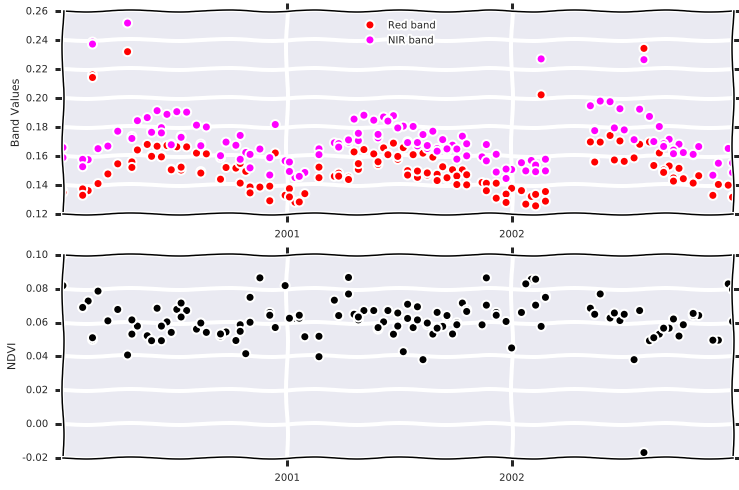

In [7]:
sns.set_style('darkgrid')
plt.xkcd()
fig = plot_time_series(data_df)
